# Web Scraping
## Gathering information from web pages using Python


## HTML fundamentals

HyperText Markup Language (**HTML**) is the language used for controlling the **structure** of content on a **web page**.


- Cascading Style Sheets (**CSS**) control the **style** in which the content and structure is presented

- **JavaScript** is used to control the **behaviour** of a web pages when the user interacts with it

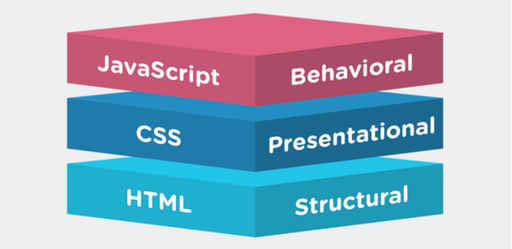

### HTML tags

The **content** on a web page is typically **nested** within various **HTML tags**. These tags designate the **type of content** within them, and allow CSS and Javascript (usually in separate files) to style and manipulate it as required. If there is no CSS file, the **web browser** will use them to apply default styling.

The HTML tags found in the **source code** of a web page can be used to identify elements such as:

- page title and section headings
- paragraphs and important words
- links, lists and images
- table rows and columns

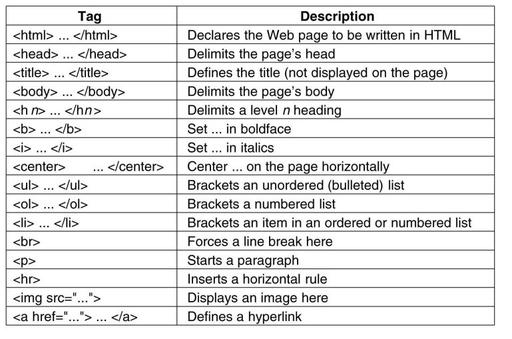

Source: [triplewclass.blogspot.com](http://triplewclass.blogspot.com/2016/03/week-2.html)

<h1>The main heading of the article</h1>
<h3>A subheading for the start of the article</h3>
<p>The first paragraph introducing what the article is about, 
    with some <strong>important words</strong> emphasised.</p>

```HTML
<h1>The main heading of the article</h1>
<h3>A subheading for the start of the article</h3>
<p>The first paragraph introducing what the article is about, 
    with some <strong>important words</strong> emphasised.</p>
```

### HTML elements

A HTML file is made up of **elements**. Most elements consist of **opening and closing tags**, and the **content** within those tags.

Elements can be **nested** within within one another.
- in the previous example, we had the `<strong>important words</strong>` element within a paragraph `<p>...</p>` element.

Elements can also have **attributes**, which are placed within the **opening tag**:
```html
<p id='analysis' class='optional'>Extra considerations you don't have to read... 
</p>
```

- `id` values must be **unique** to the document
- `class` values are typically used with **multiple elements**

These attributes allow CSS and Javascript to target specific elements (or groups of elements) on the page 

... and can allow more detailed understanding of the page content from the HTML


## Beautiful Soup

Beautiful Soup is a Python package which can help us to **extract data from web pages**, using our knowledge of **HTML tags**, **elements**, and **attributes**.


Run the following to see if you have the package installed already:

In [46]:
!conda list beautifulsoup4

# packages in environment at /Users/pc/miniconda3:
#
# Name                    Version                   Build  Channel
beautifulsoup4            4.9.0                    pypi_0    pypi


If nothing is found, uncomment and run the following command:

In [47]:
#!conda install -c anaconda beautifulsoup4 -y

In [48]:
from bs4 import BeautifulSoup

with open('data/europe-wiki.html', 'rb') as file:
    page = BeautifulSoup(file)

- the package `bs4` includes an object class called `BeautifulSoup`, which we have imported
- we have assigned to `page` a `BeautifulSoup` object, which was created using our opened HTML file text as an argument

The `BeautifulSoup` object `page` has numerous **methods** and **attributes** which we can use to **access elements**, and the text and data within them:

In [49]:
page.title

<title>Europe - Wikipedia</title>

In [50]:
page.title.string

'Europe - Wikipedia'

- the `.title` attribute of `page` returns the `<title>` element
- the `.string` attribute of this element returns the content

In [51]:
linked_image = page.find_all('a', attrs={'class':'image'})[0]
linked_image

<a class="image" href="https://en.wikipedia.org/wiki/File:Europe_orthographic_Caucasus_Urals_boundary_(with_borders).svg"><img alt="Europe orthographic Caucasus Urals boundary (with borders).svg" data-file-height="536" data-file-width="537" decoding="async" height="220" src="./europe-wiki_files/220px-Europe_orthographic_Caucasus_Urals_boundary_(with_borders).svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/44/Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg/330px-Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/44/Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg/440px-Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg.png 2x" width="220"/></a>

- the `.find_all` method returns a list of elements matching the criteria
    - the first argument identifies the type of element
    - the `attrs` parameter takes a dictionary of attributes

We can continue to use the same methods to extract more detailed information from the result:

In [52]:
image_detail = linked_image.find('img')
image_detail

<img alt="Europe orthographic Caucasus Urals boundary (with borders).svg" data-file-height="536" data-file-width="537" decoding="async" height="220" src="./europe-wiki_files/220px-Europe_orthographic_Caucasus_Urals_boundary_(with_borders).svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/44/Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg/330px-Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/44/Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg/440px-Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg.png 2x" width="220"/>

- the `.find()` method will return the first (and in this case only) instance of the given tag

In [53]:
image_detail.attrs

{'alt': 'Europe orthographic Caucasus Urals boundary (with borders).svg',
 'src': './europe-wiki_files/220px-Europe_orthographic_Caucasus_Urals_boundary_(with_borders).svg.png',
 'decoding': 'async',
 'width': '220',
 'height': '220',
 'srcset': '//upload.wikimedia.org/wikipedia/commons/thumb/4/44/Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg/330px-Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/44/Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg/440px-Europe_orthographic_Caucasus_Urals_boundary_%28with_borders%29.svg.png 2x',
 'data-file-width': '537',
 'data-file-height': '536'}

- Here `.attrs` returns a dictionary of all of the atrributes found in the tag, from which we can retrieve information

In [54]:
image_detail.attrs['src']

'./europe-wiki_files/220px-Europe_orthographic_Caucasus_Urals_boundary_(with_borders).svg.png'

#### `.find_parent()`

Sometimes we want to find the element in a page which **contains** another element, i.e. the **parent** element.

- The elements *within* another element are considered **children** of that element

In [143]:
andorra_links = page.find_all('a', text='Andorra')
len(andorra_links)

3

In [144]:
andorra_tables = []

for a in andorra_links:
    if a.find_parent('table'):        
        andorra_tables.append(a.find_parent('table'))

len(andorra_tables)

2

#### `.find_parent()`

- We identified all of the instances of the text `Andorra` (which are always links on Wikipedia)
- We used `.find_parent()` to retrieve all `table` parent elements
    - one entry was not within a `table` element
    
Note that the tables are not the direct parents of the given `<a>` elements; there are `<tr>` and `<td>` tags between the `<a>` and `<table>` tags in the hieracrchy. BeautifulSoup will search up the hierarchy for the given tag.

## Parsing HTML tables with pandas

The pandas `.read_html()` method takes a string of HTML and **identifies the tables** in it
 - a list of **DataFrames** is returned (one for each table identified)
 - can be used to extract data from table elements found using BeautifulSoup

The resulting output may need to be cleaned (e.g., unusual characters or links may result in unwanted characters).



In [11]:
import pandas as pd

tables = page.find_all('table')
print(type(tables))

df = pd.read_html(str(tables))[1]
df.head()

<class 'bs4.element.ResultSet'>


,Location,Latitude,Longitude,Coldestmonth,Hottestmonth,Annualaverage
0,Lerwick,60 N,1 W,3.5,12.4,7.4
1,Stockholm,59.5 N,19 E,−1.7,18.4,7.4
2,Helsinki,60 N,25 E,−4.7,17.8,5.9
3,Saint Petersburg,60 N,30 E,−5.8,18.8,5.8
4,NaN,NaN,NaN,NaN,NaN,NaN


- we used the `.find_all()` method on our BeautifulSoup object to retieve all of the `table` elements in the file
- `tables` is a `bs4.element.ResultSet` rather than a string so we converted it to a string using `str()`
- we used the pandas `.read_html()` method to create a list of **DataFrames** from this string
- we assigned the second DataFrame in this list (at index `1`) to `df`

The fifth row of our table is full of `NaN` values - looking at the rendered table from the web page itself, can you suggest why this has happened?

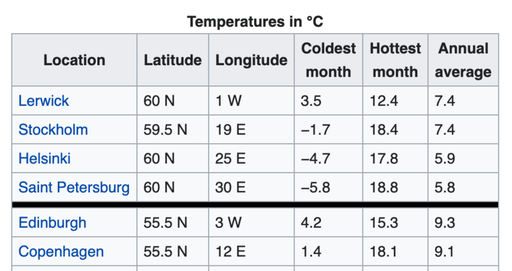




In this instance the issue can be dealt with relatively easily, using the `.dropna()` method to remove the table rows which have been used for styling purposes in the original file:

In [12]:
df_clean = df.dropna()
df_clean.head()

,Location,Latitude,Longitude,Coldestmonth,Hottestmonth,Annualaverage
0,Lerwick,60 N,1 W,3.5,12.4,7.4
1,Stockholm,59.5 N,19 E,−1.7,18.4,7.4
2,Helsinki,60 N,25 E,−4.7,17.8,5.9
3,Saint Petersburg,60 N,30 E,−5.8,18.8,5.8
5,Edinburgh,55.5 N,3 W,4.2,15.3,9.3


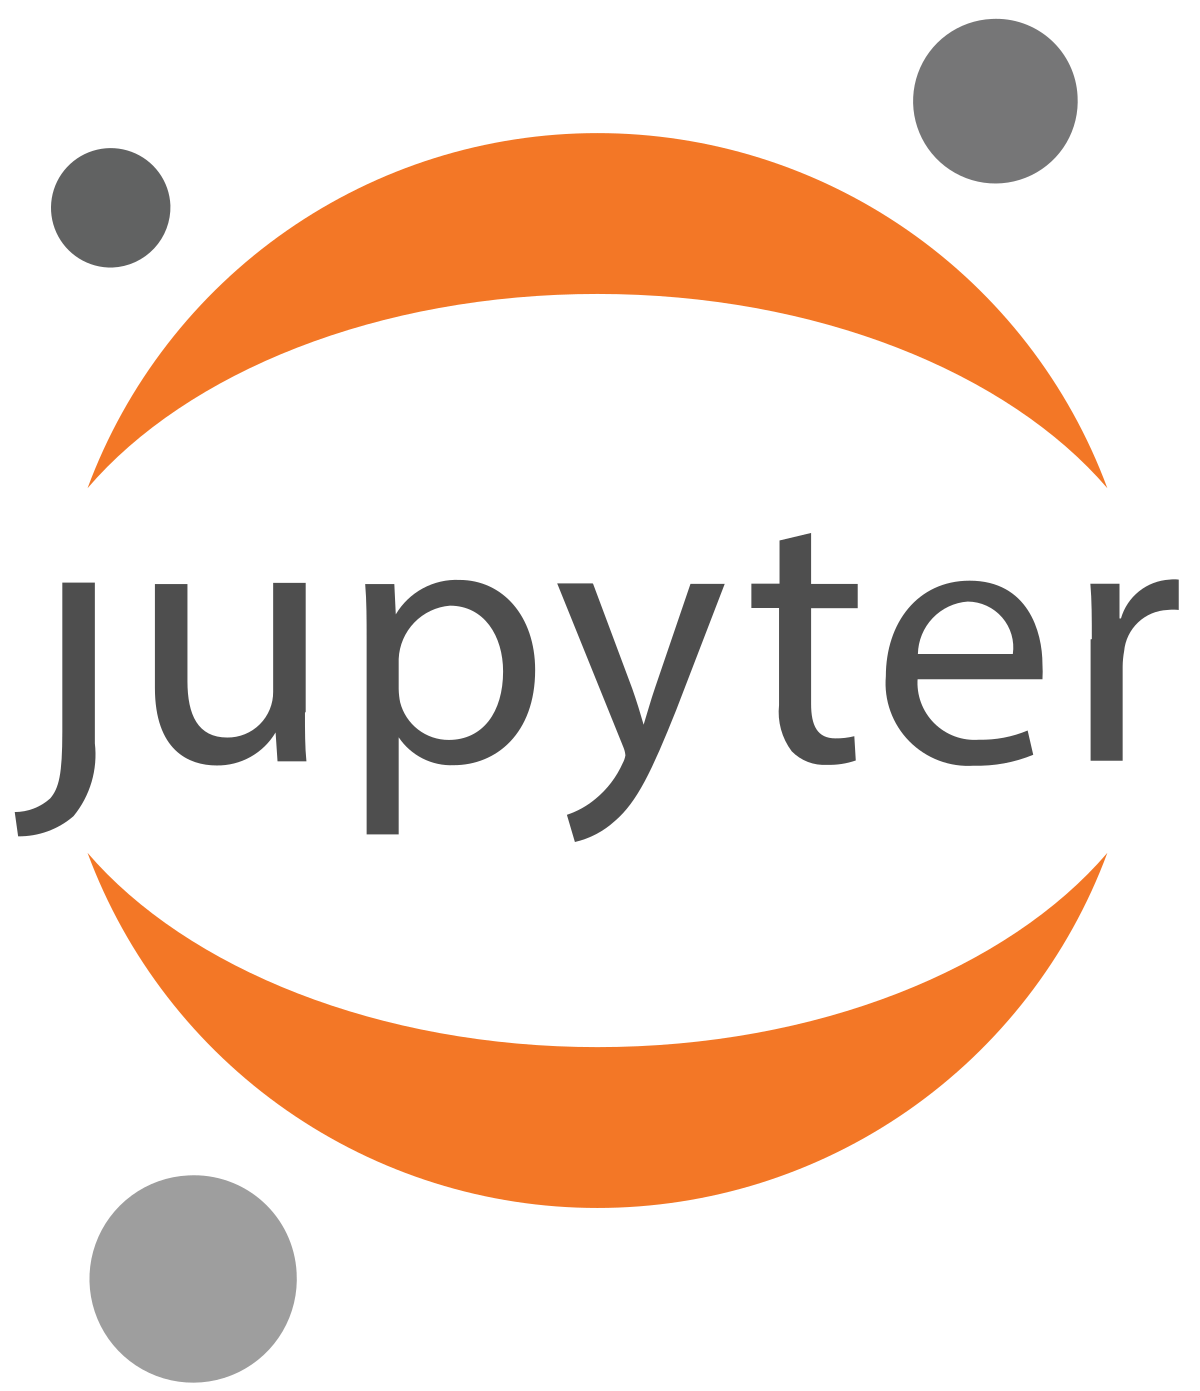

Now open the following workbook: `web-scraping-workbook.ipynb`